In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# import dataset

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="bvncxz62",
    database="supermarket"
)

ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)

In [ ]:
mydb

In [ ]:
mycursor = mydb.cursor()

# Execute SQL query to retrieve table names
mycursor.execute("SHOW TABLES")

# Fetch all table names
tables = mycursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

customer
instruction
order_detail
product
returned
shipping


In [ ]:
join_query = """
SELECT *
FROM instruction
JOIN order_detail ON instruction.`Order ID` = order_detail.`Order ID`
JOIN product ON product.`Product ID` = order_detail.`Product ID`
JOIN shipping ON shipping.`Order ID` = instruction.`Order ID`;

"""

In [ ]:
mycursor.execute(join_query)
joined_data = mycursor.fetchall()

In [ ]:
column_names = [i[0] for i in mycursor.description]

hf = pd.DataFrame(joined_data, columns=column_names)

mydb.close()

# .

In [ ]:
hf

,Order ID,Customer ID,Order Priority,Order Date,Market,Row ID,Order ID,Product ID,Sales,Quantity,...,Category,Sub-Category,Shipping ID,Order ID,Ship Date,Ship Mode,City,State,Country,Region
0,AE-2011-9160,PO-8865,Medium,2011-10-03,EMEA,48312,AE-2011-9160,TEC-EPS-10004171,78.41,6,...,Technology,Machines,38921,AE-2011-9160,2011-10-07,Standard Class,Ajman,'Ajman,United Arab Emirates,EMEA
1,AE-2011-9160,PO-8865,Medium,2011-10-03,EMEA,48313,AE-2011-9160,OFF-FEL-10001405,82.67,2,...,Office Supplies,Storage,38921,AE-2011-9160,2011-10-07,Standard Class,Ajman,'Ajman,United Arab Emirates,EMEA
2,AE-2013-1130,EB-4110,High,2013-10-14,EMEA,47297,AE-2013-1130,OFF-ACC-10004278,4.25,1,...,Office Supplies,Fasteners,25684,AE-2013-1130,2013-10-14,Same Day,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA
3,AE-2013-1130,EB-4110,High,2013-10-14,EMEA,47298,AE-2013-1130,FUR-BUS-10003055,224.75,6,...,Furniture,Bookcases,25684,AE-2013-1130,2013-10-14,Same Day,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA
4,AE-2013-1530,MY-7380,High,2013-12-31,EMEA,48617,AE-2013-1530,OFF-TEN-10002817,6.97,1,...,Office Supplies,Storage,43486,AE-2013-1530,2014-01-03,Second Class,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2014-7610,BS-1380,Medium,2014-03-24,Africa,42070,ZI-2014-7610,OFF-ADV-10000551,4.08,1,...,Office Supplies,Fasteners,42764,ZI-2014-7610,2014-03-28,Standard Class,Bulawayo,Bulawayo,Zimbabwe,Africa
49666,ZI-2014-9540,BT-1395,Medium,2014-06-09,Africa,48836,ZI-2014-9540,OFF-BIN-10001274,7.16,2,...,Office Supplies,Art,45779,ZI-2014-9540,2014-06-15,Standard Class,Harare,Harare,Zimbabwe,Africa
49667,ZI-2014-9550,JC-5775,Medium,2014-12-18,Africa,48372,ZI-2014-9550,TEC-KON-10003116,71.64,2,...,Technology,Machines,40523,ZI-2014-9550,2014-12-23,Standard Class,Bulawayo,Bulawayo,Zimbabwe,Africa
49668,ZI-2014-9550,JC-5775,Medium,2014-12-18,Africa,48373,ZI-2014-9550,OFF-AVE-10000543,1.16,1,...,Office Supplies,Binders,40523,ZI-2014-9550,2014-12-23,Standard Class,Bulawayo,Bulawayo,Zimbabwe,Africa


In [ ]:
hf.columns

Index(['Order ID', 'Customer ID', 'Order Priority', 'Order Date', 'Market',
       'Row ID', 'Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Product ID', 'Product Name', 'Category',
       'Sub-Category', 'Shipping ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'City', 'State', 'Country', 'Region'],
      dtype='object')

In [ ]:
hf.isna().sum()

Order ID          0
Customer ID       0
Order Priority    0
Order Date        0
Market            0
Row ID            0
Order ID          0
Product ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Product ID        0
Product Name      0
Category          0
Sub-Category      0
Shipping ID       0
Order ID          0
Ship Date         0
Ship Mode         0
City              0
State             0
Country           0
Region            0
dtype: int64

In [ ]:
hf.columns

Index(['Order ID', 'Customer ID', 'Order Priority', 'Order Date', 'Market',
       'Row ID', 'Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Product ID', 'Product Name', 'Category',
       'Sub-Category', 'Shipping ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'City', 'State', 'Country', 'Region'],
      dtype='object')

In [ ]:
df=hf[['Order ID','Order Priority','Order Date','Market','Sales','Quantity','Discount','Shipping Cost','Product Name','Category','Sub-Category','Ship Mode','Profit']]

In [ ]:
df

,Order ID,Order ID,Order ID,Order Priority,Order Date,Market,Sales,Quantity,Discount,Shipping Cost,Product Name,Category,Sub-Category,Ship Mode,Profit
0,AE-2011-9160,AE-2011-9160,AE-2011-9160,Medium,2011-10-03,EMEA,78.41,6,0.70,3.87,"Epson Calculator, Red",Technology,Machines,Standard Class,-88.99
1,AE-2011-9160,AE-2011-9160,AE-2011-9160,Medium,2011-10-03,EMEA,82.67,2,0.70,5.69,"Fellowes File Cart, Industrial",Office Supplies,Storage,Standard Class,-157.09
2,AE-2013-1130,AE-2013-1130,AE-2013-1130,High,2013-10-14,EMEA,4.25,1,0.70,0.10,"Accos Paper Clips, Bulk Pack",Office Supplies,Fasteners,Same Day,-4.69
3,AE-2013-1130,AE-2013-1130,AE-2013-1130,High,2013-10-14,EMEA,224.75,6,0.70,60.08,"Bush Stackable Bookrack, Pine",Furniture,Bookcases,Same Day,-232.27
4,AE-2013-1530,AE-2013-1530,AE-2013-1530,High,2013-12-31,EMEA,6.97,1,0.70,1.75,"Tenex Folders, Blue",Office Supplies,Storage,Second Class,-8.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2014-7610,ZI-2014-7610,ZI-2014-7610,Medium,2014-03-24,Africa,4.08,1,0.70,0.09,"Advantus Thumb Tacks, Bulk Pack",Office Supplies,Fasteners,Standard Class,-9.51
49666,ZI-2014-9540,ZI-2014-9540,ZI-2014-9540,Medium,2014-06-09,Africa,7.16,2,0.70,0.35,"Binney & Smith Pens, Blue",Office Supplies,Art,Standard Class,-6.70
49667,ZI-2014-9550,ZI-2014-9550,ZI-2014-9550,Medium,2014-12-18,Africa,71.64,2,0.70,4.05,"Konica Receipt Printer, Red",Technology,Machines,Standard Class,-93.18
49668,ZI-2014-9550,ZI-2014-9550,ZI-2014-9550,Medium,2014-12-18,Africa,1.16,1,0.70,0.07,"Avery Hole Reinforcements, Clear",Office Supplies,Binders,Standard Class,-2.35


In [ ]:
df.columns

Index(['Order ID', 'Order ID', 'Order ID', 'Order Priority', 'Order Date',
       'Market', 'Sales', 'Quantity', 'Discount', 'Shipping Cost',
       'Product Name', 'Category', 'Sub-Category', 'Ship Mode', 'Profit'],
      dtype='object')

In [ ]:
duplicate_columns = df.columns[df.columns.duplicated()]
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
df.head()

,Order ID,Order Priority,Order Date,Market,Sales,Quantity,Discount,Shipping Cost,Product Name,Category,Sub-Category,Ship Mode,Profit
0,AE-2011-9160,Medium,2011-10-03,EMEA,78.41,6,0.70,3.87,"Epson Calculator, Red",Technology,Machines,Standard Class,-88.99
1,AE-2011-9160,Medium,2011-10-03,EMEA,82.67,2,0.70,5.69,"Fellowes File Cart, Industrial",Office Supplies,Storage,Standard Class,-157.09
2,AE-2013-1130,High,2013-10-14,EMEA,4.25,1,0.70,0.10,"Accos Paper Clips, Bulk Pack",Office Supplies,Fasteners,Same Day,-4.69
3,AE-2013-1130,High,2013-10-14,EMEA,224.75,6,0.70,60.08,"Bush Stackable Bookrack, Pine",Furniture,Bookcases,Same Day,-232.27
4,AE-2013-1530,High,2013-12-31,EMEA,6.97,1,0.70,1.75,"Tenex Folders, Blue",Office Supplies,Storage,Second Class,-8.60


In [ ]:
df.shape

(49670, 13)

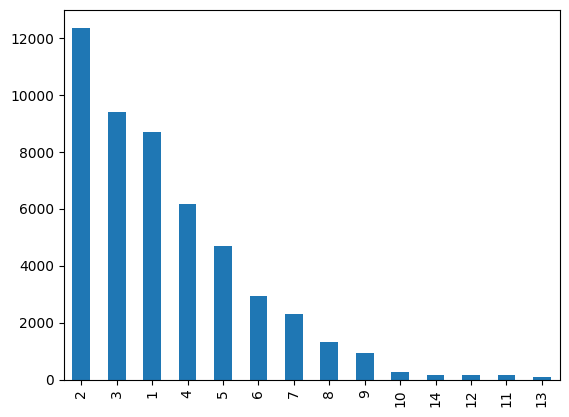

In [ ]:
df['Quantity'].value_counts().plot(kind='bar')
plt.show()

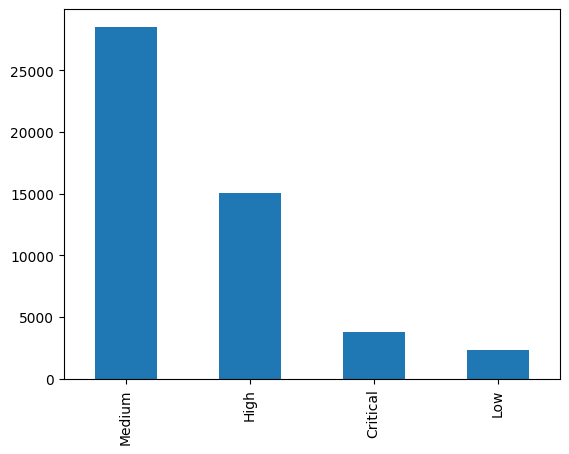

In [ ]:
df['Order Priority'].value_counts().plot(kind='bar')
plt.show()

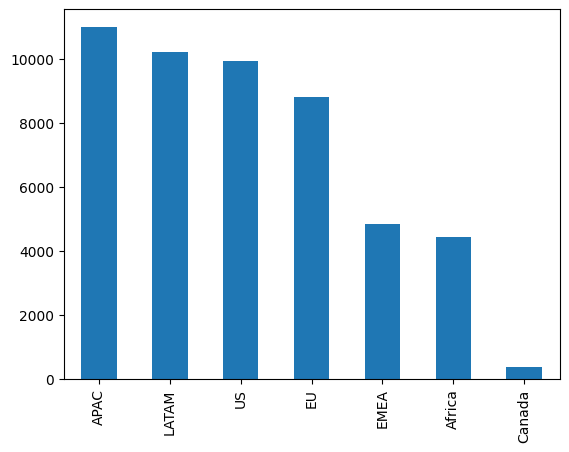

In [ ]:
df['Market'].value_counts().plot(kind='bar')
plt.show()

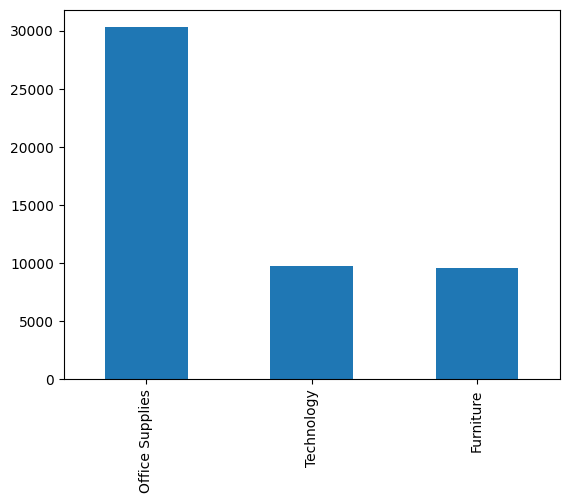

In [ ]:
df['Category'].value_counts().plot(kind='bar')
plt.show()

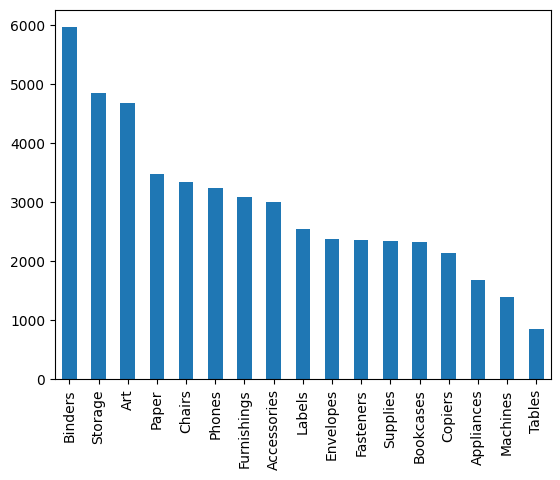

In [ ]:
df['Sub-Category'].value_counts().plot(kind='bar')
plt.show()

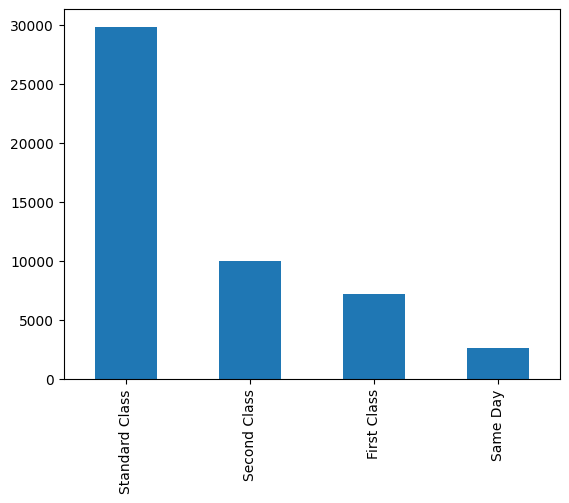

In [ ]:
df['Ship Mode'].value_counts().plot(kind='bar')
plt.show()

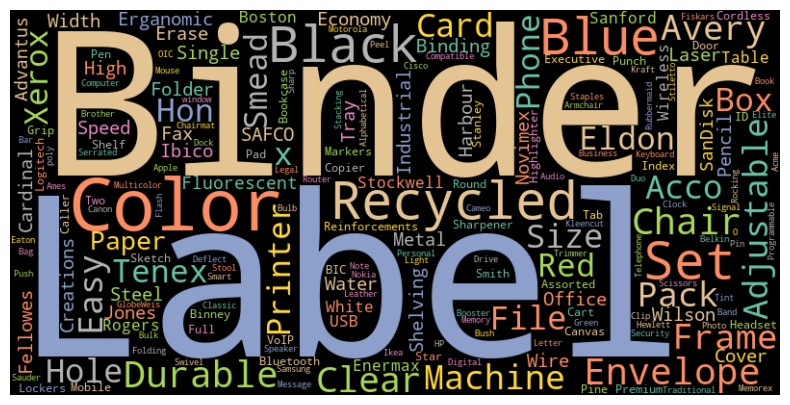

In [ ]:
text_data = ' '.join(df['Product Name'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2', collocations=False).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# df['Year'] = df['Order Date'].dt.year
# df['month'] = df['Order Date'].dt.month
df['price']=df['Sales']/df['Quantity']

In [ ]:
df=df.round(2)

In [ ]:
data=df.copy()

In [ ]:
data.head()

,Order ID,Order Priority,Order Date,Market,Sales,Quantity,Discount,Shipping Cost,Product Name,Category,Sub-Category,Ship Mode,Profit,price
0,AE-2011-9160,Medium,2011-10-03,EMEA,78.41,6,0.70,3.87,"Epson Calculator, Red",Technology,Machines,Standard Class,-88.99,13.07
1,AE-2011-9160,Medium,2011-10-03,EMEA,82.67,2,0.70,5.69,"Fellowes File Cart, Industrial",Office Supplies,Storage,Standard Class,-157.09,41.34
2,AE-2013-1130,High,2013-10-14,EMEA,4.25,1,0.70,0.10,"Accos Paper Clips, Bulk Pack",Office Supplies,Fasteners,Same Day,-4.69,4.25
3,AE-2013-1130,High,2013-10-14,EMEA,224.75,6,0.70,60.08,"Bush Stackable Bookrack, Pine",Furniture,Bookcases,Same Day,-232.27,37.46
4,AE-2013-1530,High,2013-12-31,EMEA,6.97,1,0.70,1.75,"Tenex Folders, Blue",Office Supplies,Storage,Second Class,-8.60,6.97


In [ ]:
data.drop(['Order Date','Product Name','Category'],axis=1,inplace=True)

In [ ]:
data.head()

,Order ID,Order Priority,Market,Sales,Quantity,Discount,Shipping Cost,Sub-Category,Ship Mode,Profit,price
0,AE-2011-9160,Medium,EMEA,78.41,6,0.70,3.87,Machines,Standard Class,-88.99,13.07
1,AE-2011-9160,Medium,EMEA,82.67,2,0.70,5.69,Storage,Standard Class,-157.09,41.34
2,AE-2013-1130,High,EMEA,4.25,1,0.70,0.10,Fasteners,Same Day,-4.69,4.25
3,AE-2013-1130,High,EMEA,224.75,6,0.70,60.08,Bookcases,Same Day,-232.27,37.46
4,AE-2013-1530,High,EMEA,6.97,1,0.70,1.75,Storage,Second Class,-8.60,6.97


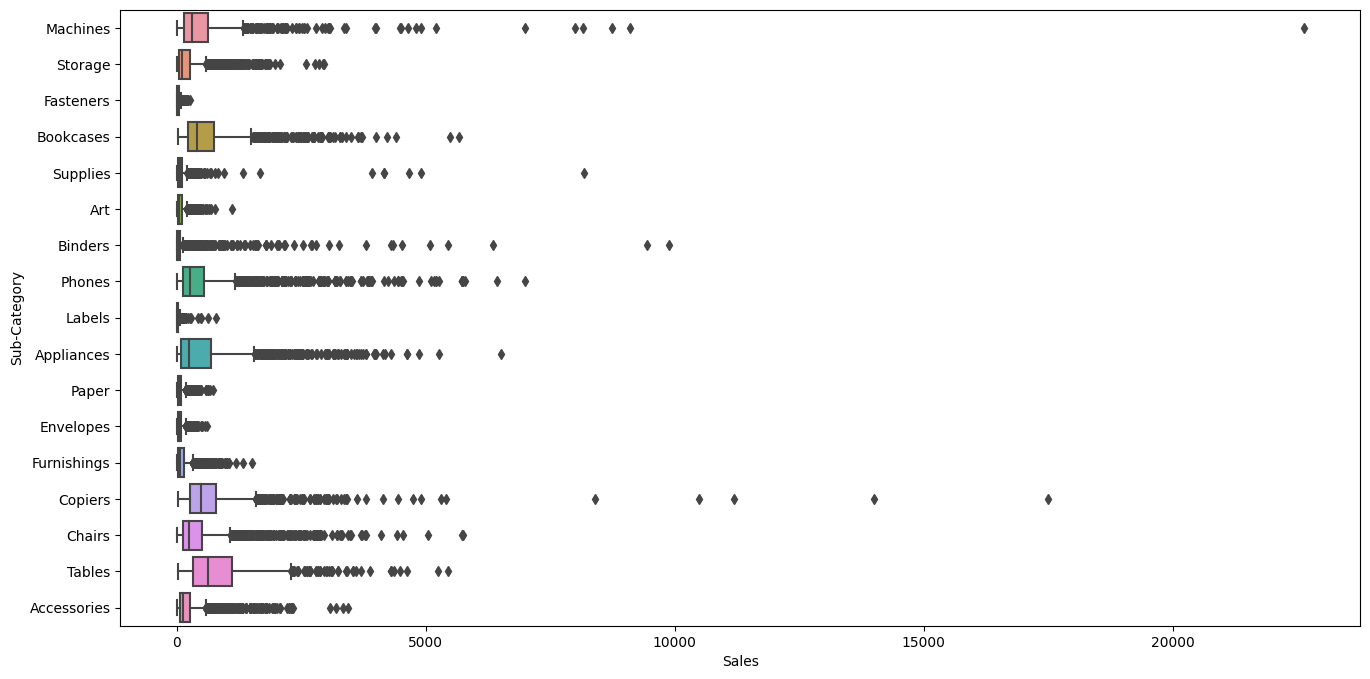

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x="Sales", y="Sub-Category")
plt.show()

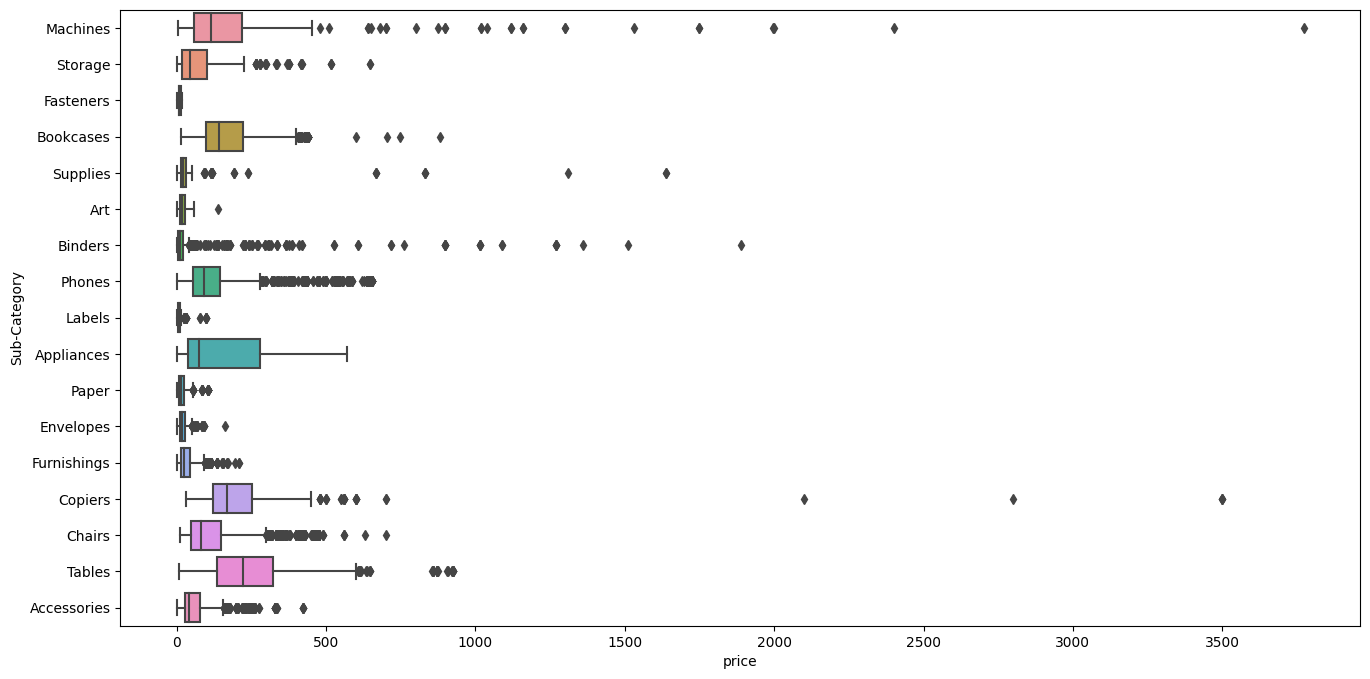

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x="price", y="Sub-Category")
plt.show()

In [ ]:
# groups = data.groupby('Sub-Category')
# filtered_data = []

# for name, group in groups:
#     Q1 = group['Profit'].quantile(0.25)
#     Q3 = group['Profit'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     filtered_group = group[(group['Profit'] >= lower_bound) & (group['Profit'] <= upper_bound)]
#     filtered_data.append(filtered_group)
# data_cl = pd.concat(filtered_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f64a6848e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f64a684e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f64a684640>],
 'medians': [<matplotlib.lines.Line2D at 0x2f64a685360>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f64a685600>],
 'means': []}

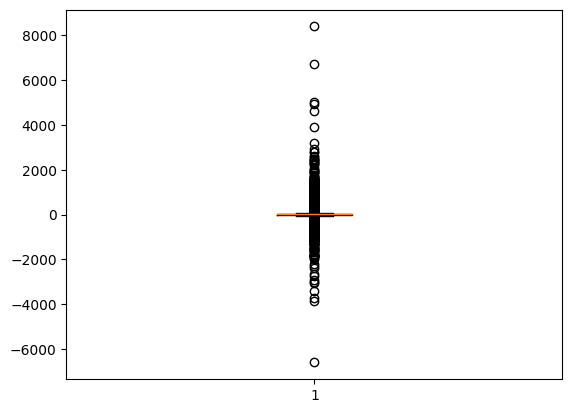

In [ ]:
plt.boxplot(data['Profit'])

In [ ]:
Q1 = data['Profit'].quantile(0.1)
Q3 = data['Profit'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cl = data[(data['Profit'] >= lower_bound) & (data['Profit'] <= upper_bound)]

In [ ]:
data_cl.shape

(47529, 11)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f64a5f89a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f64a5f8ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f64a5f8700>],
 'medians': [<matplotlib.lines.Line2D at 0x2f64a5f9420>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f64a5f96c0>],
 'means': []}

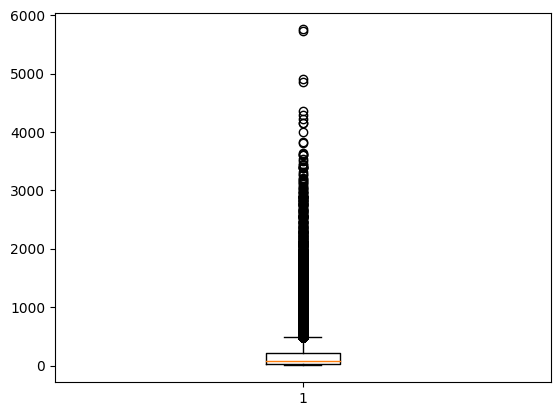

In [ ]:
plt.boxplot(data_cl['Sales'])

In [ ]:
data_cl.shape

(47529, 11)

In [ ]:
Q1 = data_cl['Sales'].quantile(0.1)
Q3 = data_cl['Sales'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cl = data_cl[(data_cl['Sales'] >= lower_bound) & (data_cl['Sales'] <= upper_bound)]

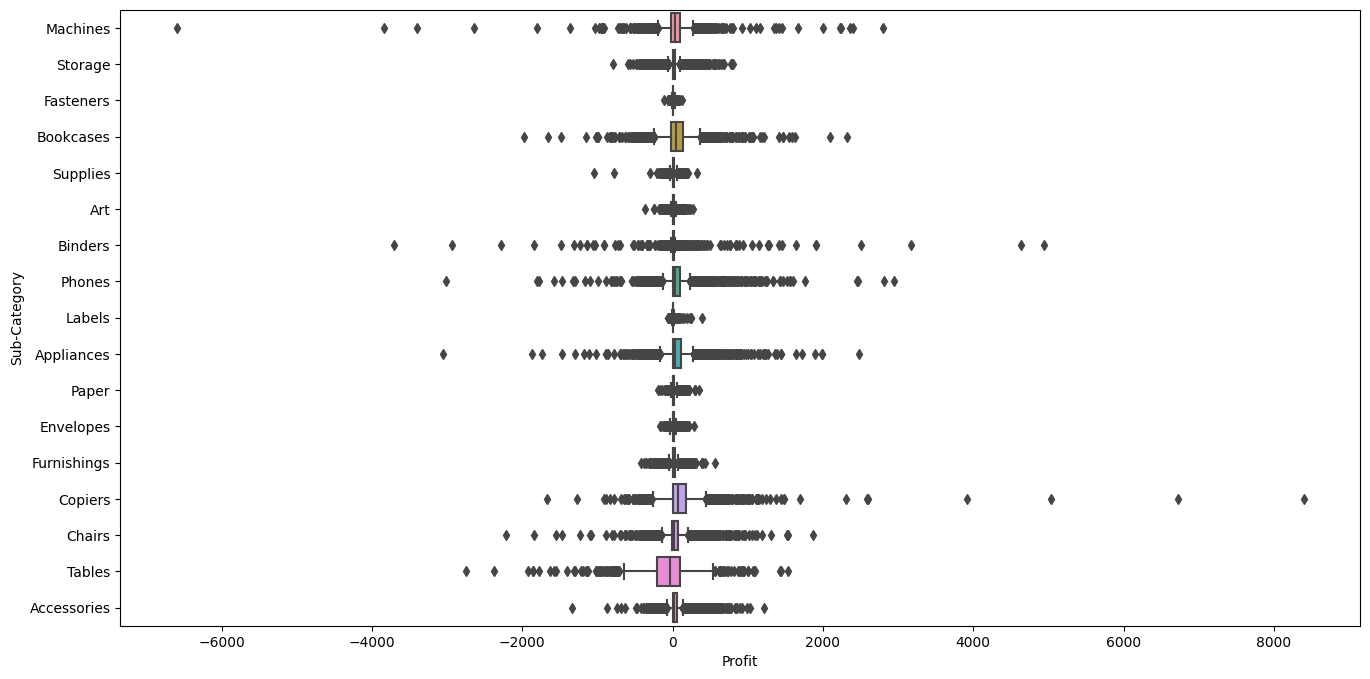

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x="Profit", y="Sub-Category")
plt.show()

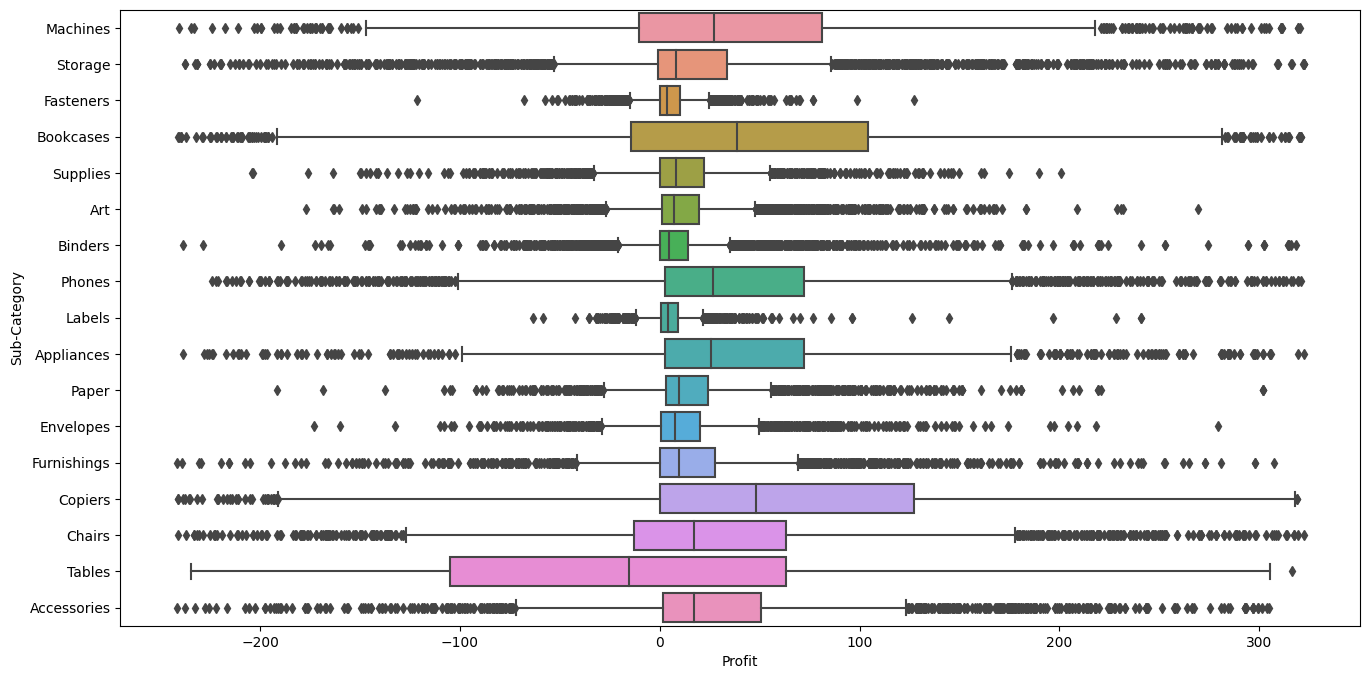

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_cl, x="Profit", y="Sub-Category")
plt.show()

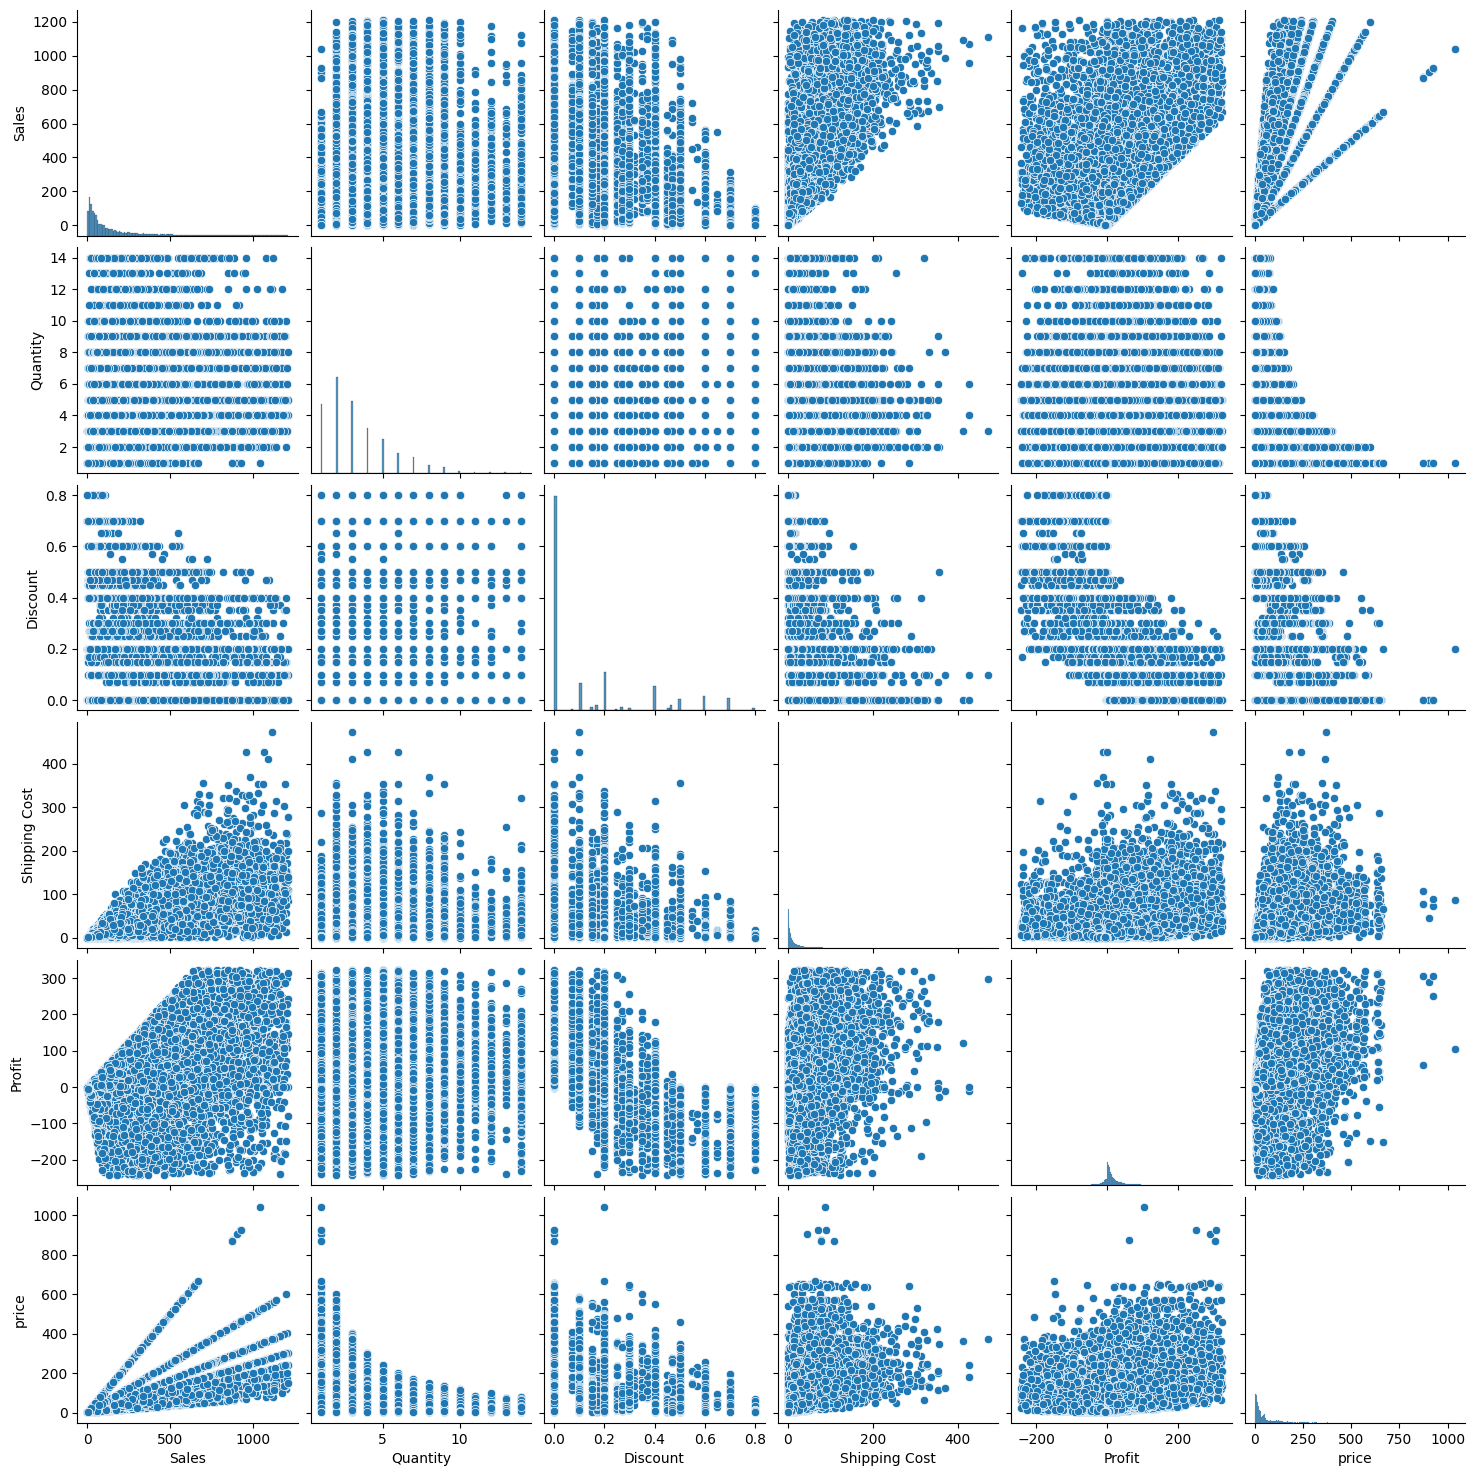

In [ ]:
sns.pairplot(data=data_cl)
plt.show()

In [ ]:
data_cl

,Order ID,Order Priority,Market,Sales,Quantity,Discount,Shipping Cost,Sub-Category,Ship Mode,Profit,price
0,AE-2011-9160,Medium,EMEA,78.41,6,0.70,3.87,Machines,Standard Class,-88.99,13.07
1,AE-2011-9160,Medium,EMEA,82.67,2,0.70,5.69,Storage,Standard Class,-157.09,41.34
2,AE-2013-1130,High,EMEA,4.25,1,0.70,0.10,Fasteners,Same Day,-4.69,4.25
3,AE-2013-1130,High,EMEA,224.75,6,0.70,60.08,Bookcases,Same Day,-232.27,37.46
4,AE-2013-1530,High,EMEA,6.97,1,0.70,1.75,Storage,Second Class,-8.60,6.97
...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2014-7610,Medium,Africa,4.08,1,0.70,0.09,Fasteners,Standard Class,-9.51,4.08
49666,ZI-2014-9540,Medium,Africa,7.16,2,0.70,0.35,Art,Standard Class,-6.70,3.58
49667,ZI-2014-9550,Medium,Africa,71.64,2,0.70,4.05,Machines,Standard Class,-93.18,35.82
49668,ZI-2014-9550,Medium,Africa,1.16,1,0.70,0.07,Binders,Standard Class,-2.35,1.16


In [ ]:
data_cl.shape

(46765, 11)

# numberize

In [ ]:
data_num=data_cl.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data_num['Market']=LE.fit_transform(data_num['Market'])
data_num['Sub-Category']=LE.fit_transform(data_num['Sub-Category'])
data_num['Ship Mode']=LE.fit_transform(data_num['Ship Mode'])
# Ship_Mode = pd.get_dummies(data_num['Ship Mode'])
data_num['Order Priority']=LE.fit_transform(data_num['Order Priority'])

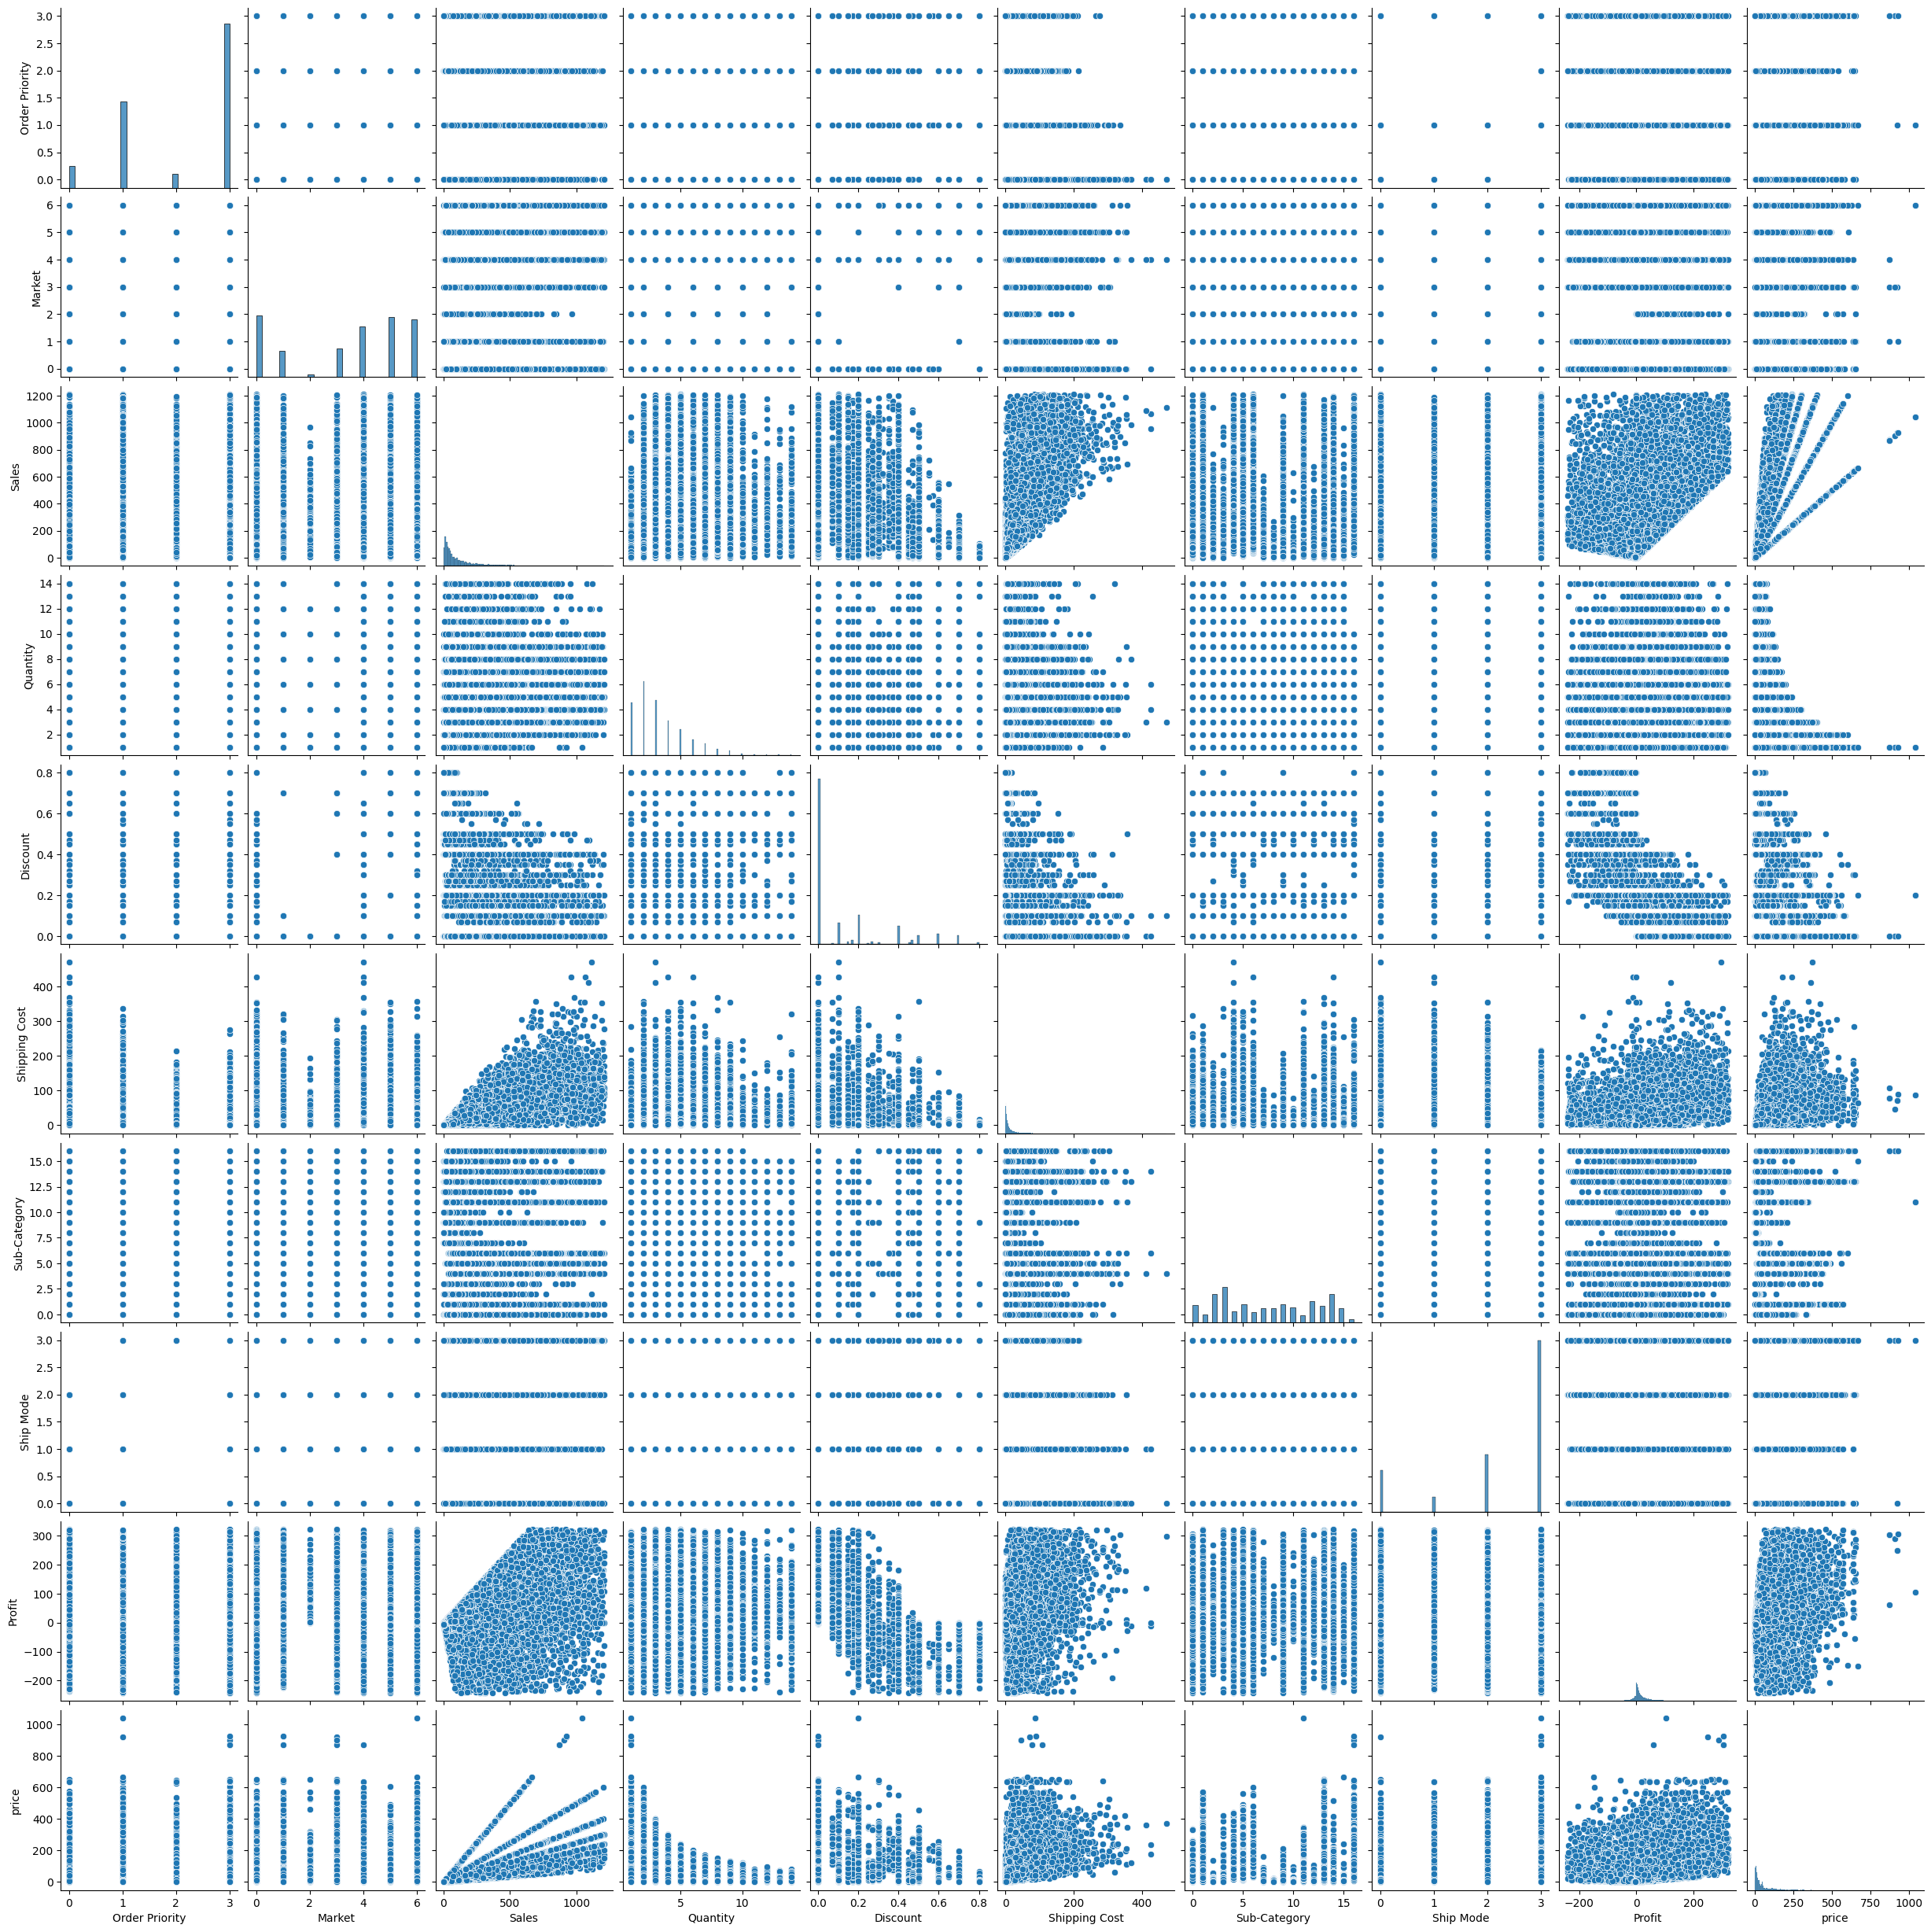

In [ ]:
sns.pairplot(data=data_num)

# .

In [ ]:
data_class=data_num.drop(['Order ID','Quantity'],axis=1)
# data_class=data_class[['Sales','Sub-Category','Shipping Cost','price','S_M','D_M','Discount','Profit']]

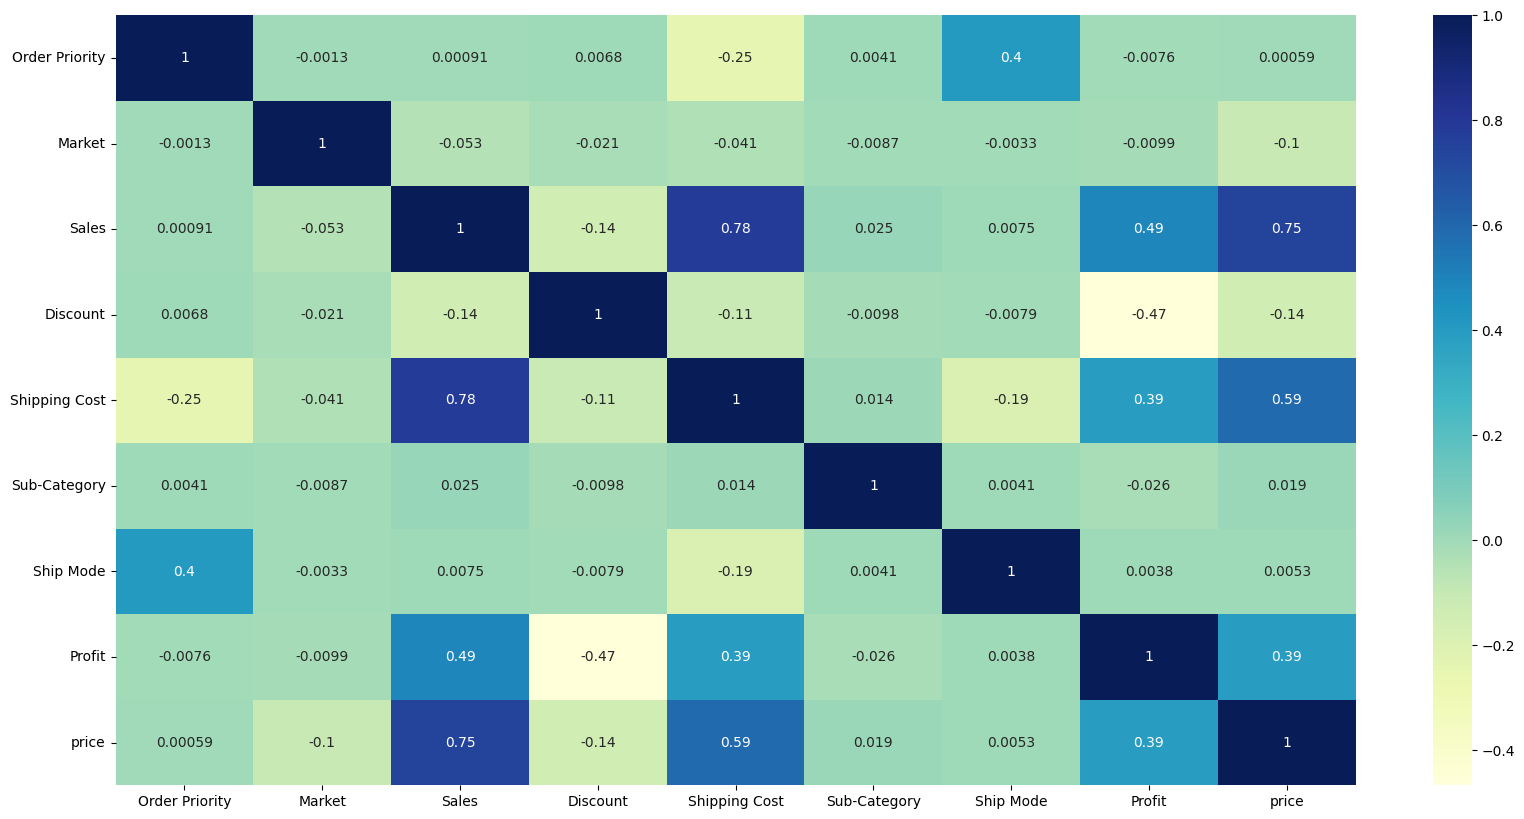

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
corrMatrix = data_class.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
data_class

,Order Priority,Market,Sales,Discount,Shipping Cost,Sub-Category,Ship Mode,Profit,price
0,3,3,78.41,0.70,3.87,11,3,-88.99,13.07
1,3,3,82.67,0.70,5.69,14,3,-157.09,41.34
2,1,3,4.25,0.70,0.10,8,1,-4.69,4.25
3,1,3,224.75,0.70,60.08,4,1,-232.27,37.46
4,1,3,6.97,0.70,1.75,14,2,-8.60,6.97
...,...,...,...,...,...,...,...,...,...
49665,3,1,4.08,0.70,0.09,8,3,-9.51,4.08
49666,3,1,7.16,0.70,0.35,2,3,-6.70,3.58
49667,3,1,71.64,0.70,4.05,11,3,-93.18,35.82
49668,3,1,1.16,0.70,0.07,3,3,-2.35,1.16


In [ ]:
train_x,test_x=train_test_split(data_class,test_size=0.3)
valid_x,test_x=train_test_split(test_x,test_size=0.5)

In [ ]:
# train datas
train_x['mean_cat'] = train_x.groupby('Sub-Category')['price'].transform('mean')
train_x['P_M']=train_x['price']/train_x['mean_cat']
train_x['sales_mean_cat'] = train_x.groupby('Sub-Category')['Sales'].transform('mean')
train_x['S_M']=data['Sales']/train_x['sales_mean_cat']
train_x['dis_mean_cat'] = train_x.groupby('Sub-Category')['Discount'].transform('mean')
train_x['D_M']=train_x['Discount']/train_x['dis_mean_cat']

# validation datas
valid_x['mean_cat'] = valid_x.groupby('Sub-Category')['price'].transform('mean')
valid_x['P_M']=valid_x['price']/valid_x['mean_cat']
valid_x['sales_mean_cat'] = valid_x.groupby('Sub-Category')['Sales'].transform('mean')
valid_x['S_M']=valid_x['Sales']/valid_x['sales_mean_cat']
valid_x['dis_mean_cat'] = valid_x.groupby('Sub-Category')['Discount'].transform('mean')
valid_x['D_M']=valid_x['Discount']/valid_x['dis_mean_cat']

# test datas
test_x['mean_cat'] = test_x.groupby('Sub-Category')['price'].transform('mean')
test_x['P_M']=test_x['price']/test_x['mean_cat']
test_x['sales_mean_cat'] = test_x.groupby('Sub-Category')['Sales'].transform('mean')
test_x['S_M']=test_x['Sales']/test_x['sales_mean_cat']
test_x['dis_mean_cat'] = test_x.groupby('Sub-Category')['Discount'].transform('mean')
test_x['D_M']=test_x['Discount']/test_x['dis_mean_cat']

In [ ]:
train_x.drop(['Discount','sales_mean_cat','mean_cat','dis_mean_cat'],axis=1,inplace=True)
valid_x.drop(['Discount','sales_mean_cat','mean_cat','dis_mean_cat'],axis=1,inplace=True)
test_x.drop(['Discount','sales_mean_cat','mean_cat','dis_mean_cat'],axis=1,inplace=True)

In [ ]:
train_x

,Order Priority,Market,Sales,Shipping Cost,Sub-Category,Ship Mode,Profit,price,P_M,S_M,D_M
21798,3,0,126.63,12.98,0,2,17.64,42.21,0.69,0.67,0.00
39080,1,5,38.04,5.46,9,3,4.56,19.02,0.55,0.32,0.00
26788,0,0,75.87,23.19,9,0,22.68,25.29,0.73,0.64,0.00
461,1,1,11.55,0.71,3,3,2.76,11.55,0.72,0.21,0.00
2054,3,6,9.45,0.53,10,1,4.54,3.15,0.41,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...
47840,2,6,727.30,93.94,14,3,-172.73,90.91,1.46,3.87,1.49
43808,3,3,11.52,0.40,3,3,-4.32,11.52,0.72,0.21,3.32
26042,3,0,48.33,5.18,10,2,13.38,9.67,1.25,1.71,0.83
5089,2,6,65.34,7.15,1,3,22.87,21.78,0.18,0.23,0.00


In [ ]:
MMS=MinMaxScaler()
X_train=pd.DataFrame(MMS.fit_transform(train_x),columns = train_x.columns)
X_valid=pd.DataFrame(MMS.fit_transform(valid_x),columns = valid_x.columns)
X_test=pd.DataFrame(MMS.fit_transform(test_x),columns = test_x.columns)
y_train=X_train['Profit']
y_valid=X_valid['Profit']
y_test=X_test['Profit']
X_train.drop(['Profit'],axis=1,inplace=True)
X_test.drop(['Profit'],axis=1,inplace=True)
X_valid.drop(['Profit'],axis=1,inplace=True)

In [ ]:
selected_models = ['Lasso','GaussianMixture', 'Ridge', 'ElasticNet', 'RandomForestRegressor', 'DecisionTreeRegressor',
                   'SVR', 'KNeighborsRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor',
                   'ExtraTreesRegressor', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor']

# Assuming you have X_train, X_test, y_train, and y_test datasets

# Split the data into training and test sets

# Create and fit the LazyRegressor with the selected models
regressors = [reg for reg in lazypredict.Supervised.REGRESSORS if reg[0] in selected_models]
reg = LazyRegressor(verbose=0, regressors=regressors, custom_metric=r2_score)
models, predictions = reg.fit(X_train, X_valid, y_train, y_valid)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:43<00:00,  3.63s/it]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,r2_score
Model,,,,,
LGBMRegressor,0.62,0.62,0.07,0.23,0.62
GradientBoostingRegressor,0.61,0.61,0.07,4.58,0.61
ExtraTreesRegressor,0.60,0.61,0.07,8.69,0.61
RandomForestRegressor,0.60,0.60,0.07,16.11,0.60
XGBRegressor,0.55,0.55,0.07,2.40,0.55
AdaBoostRegressor,0.55,0.55,0.08,0.83,0.55
SVR,0.46,0.46,0.08,9.33,0.46
KNeighborsRegressor,0.42,0.42,0.08,0.79,0.42
Ridge,0.38,0.38,0.09,0.12,0.38


In [ ]:
selected_models = ['Lasso','GaussianMixture', 'Ridge', 'ElasticNet', 'RandomForestRegressor', 'DecisionTreeRegressor',
                   'SVR', 'KNeighborsRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor',
                   'ExtraTreesRegressor', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor']

# Assuming you have X_train, X_test, y_train, and y_test datasets

# Split the data into training and test sets

# Create and fit the LazyRegressor with the selected models
regressors = [reg for reg in lazypredict.Supervised.REGRESSORS if reg[0] in selected_models]
reg = LazyRegressor(verbose=0, regressors=regressors, custom_metric=r2_score)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.85s/it]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,r2_score
Model,,,,,
LGBMRegressor,0.61,0.61,0.07,0.23,0.61
ExtraTreesRegressor,0.61,0.61,0.07,8.58,0.61
RandomForestRegressor,0.61,0.61,0.07,18.11,0.61
GradientBoostingRegressor,0.60,0.60,0.07,4.58,0.60
XGBRegressor,0.58,0.58,0.07,2.21,0.58
AdaBoostRegressor,0.54,0.54,0.08,0.73,0.54
SVR,0.46,0.46,0.08,10.67,0.46
KNeighborsRegressor,0.45,0.45,0.08,0.72,0.45
Ridge,0.37,0.37,0.09,0.02,0.37


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_valid)

In [ ]:
from sklearn.metrics import  r2_score
r2_score(y_valid,pred)

0.3837719687317631

In [ ]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred_5=DTR.predict(X_valid)

In [ ]:
r2_score(y_valid,pred_5)

0.09496774739326175